<a href="https://colab.research.google.com/github/SaieshNeeli/zenqor-labs/blob/master/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Structure Verification and Documentation
import zipfile
import os

zip_filename = "archive.zip"
extract_path = "/content/"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f" Extracted '{zip_filename}' to: {extract_path}")

# List all files and folders.
print("\n Directory Structure:\n")
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        print(f"{subindent}{file}")

# Check for common documentation files
doc_files = ["README.txt", "README.md", "index.html"]
found_docs = []

for doc in doc_files:
    for root, dirs, files in os.walk(extract_path):
        if doc in files:
            found_docs.append(os.path.join(root, doc))

print("\n Documentation Files Found:")
if found_docs:
    for doc in found_docs:
        print(f"{doc}")
else:
    print(" No standard documentation files (README or index.html) found.")

#  Preview index.html if exists with encoding fallback
index_path = None
for doc in found_docs:
    if doc.endswith("index.html"):
        index_path = doc
        break

if index_path:
    from IPython.display import display, HTML
    try:
        with open(index_path, 'r', encoding='utf-8') as f:
            html_content = f.read()
    except UnicodeDecodeError:
        with open(index_path, 'r', encoding='latin-1') as f:
            html_content = f.read()
    print("\n Previewing index.html content below:")
    display(HTML(html_content))
else:
    print("\n No index.html file found to preview.")

 Extracted 'archive.zip' to: /content/

 Directory Structure:

/
  KDDTest+.txt
  KDDTest1.jpg
  index.html
  KDDTest+.arff
  KDDTest-21.arff
  KDDTest-21.txt
  KDDTrain+_20Percent.txt
  KDDTrain+.txt
  KDDTrain+.arff
  archive.zip
  KDDTrain1.jpg
  KDDTrain+_20Percent.arff
.config/
  .last_survey_prompt.yaml
  gce
  active_config
  default_configs.db
  hidden_gcloud_config_universe_descriptor_data_cache_configs.db
  .last_opt_in_prompt.yaml
  .last_update_check.json
  config_sentinel
  configurations/
    config_default
  logs/
    2025.06.23/
      13.36.59.539466.log
      13.37.21.645147.log
      13.37.31.575304.log
      13.37.33.586566.log
      13.37.43.483451.log
      13.37.44.211435.log
nsl-kdd/
  KDDTest+.txt
  KDDTest1.jpg
  index.html
  KDDTest+.arff
  KDDTest-21.arff
  KDDTest-21.txt
  KDDTrain+_20Percent.txt
  KDDTrain+.txt
  KDDTrain+.arff
  KDDTrain1.jpg
  KDDTrain+_20Percent.arff
sample_data/
  README.md
  anscombe.json
  mnist_train_small.csv
  california_housing_te

Data Loading

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Load the KDDTrain+ data file
data_path = "/content/KDDTrain+.txt"
df = pd.read_csv(data_path, header=None)

In [ ]:
col_names = [
    # 41 original features
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    # Target + difficulty
    'class', 'difficulty_level'
]
df.columns = col_names

print(f" Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")

 Data Loaded: 125973 rows, 43 columns


Check For Missing Values

In [ ]:
print("\n Missing Values Summary:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])


 Missing Values Summary:
Series([], dtype: int64)


Encoding Categorical Features

In [ ]:
cat_cols = ['protocol_type', 'service', 'flag']
df_encoded = pd.get_dummies(df, columns=cat_cols)

Applying Robust Scaler


In [ ]:
scaler = RobustScaler()
scaled_array = scaler.fit_transform(df_encoded.drop("class", axis=1))
df_scaled = pd.DataFrame(scaled_array, columns=df_encoded.columns[:-1])
df_scaled["class"] = df["class"]

print("\n Applied RobustScaler. Shape:", df_scaled.shape)


 Applied RobustScaler. Shape: (125973, 123)


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# features_to_plot = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
#     'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
#     'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
#     'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
#     'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
#     'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
#     'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
#     'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
#     'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
#     'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
#     # Target + difficulty
#     'class', 'difficulty_level']

# # Plot BEFORE scaling
# for col in features_to_plot:
#     if col in df.columns:
#         plt.figure(figsize=(12, 4))

#         # Distribution plot
#         plt.subplot(1, 2, 1)
#         sns.histplot(df[col], bins=50, kde=True)
#         plt.title(f"Distribution Before Scaling: {col}")

#         # Boxplot
#         plt.subplot(1, 2, 2)
#         sns.boxplot(x=df[col])
#         plt.title(f"Boxplot Before Scaling: {col}")

#         plt.tight_layout()
#         plt.show()

# # Plot AFTER RobustScaler
# for col in features_to_plot:
#     if col in df_scaled.columns:
#         plt.figure(figsize=(12, 4))

#         # Distribution plot
#         plt.subplot(1, 2, 1)
#         sns.histplot(df_scaled[col], bins=50, kde=True)
#         plt.title(f"Distribution After RobustScaler: {col}")

#         # Boxplot
#         plt.subplot(1, 2, 2)
#         sns.boxplot(x=df_scaled[col])
#         plt.title(f"Boxplot After RobustScaler: {col}")

#         plt.tight_layout()
#         plt.show()

Winsorization (Optional)

Applied Winsorization to 'duration'. New column: 'duration_wins'
Applied Winsorization to 'src_bytes'. New column: 'src_bytes_wins'
Applied Winsorization to 'dst_bytes'. New column: 'dst_bytes_wins'
Applied Winsorization to 'land'. New column: 'land_wins'
Applied Winsorization to 'wrong_fragment'. New column: 'wrong_fragment_wins'
Applied Winsorization to 'urgent'. New column: 'urgent_wins'
Applied Winsorization to 'hot'. New column: 'hot_wins'
Applied Winsorization to 'num_failed_logins'. New column: 'num_failed_logins_wins'
Applied Winsorization to 'num_compromised'. New column: 'num_compromised_wins'
Applied Winsorization to 'root_shell'. New column: 'root_shell_wins'
Applied Winsorization to 'su_attempted'. New column: 'su_attempted_wins'
Applied Winsorization to 'num_root'. New column: 'num_root_wins'
Applied Winsorization to 'num_file_creations'. New column: 'num_file_creations_wins'
Applied Winsorization to 'num_shells'. New column: 'num_shells_wins'
Applied Winsorization to 'nu

/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:954: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


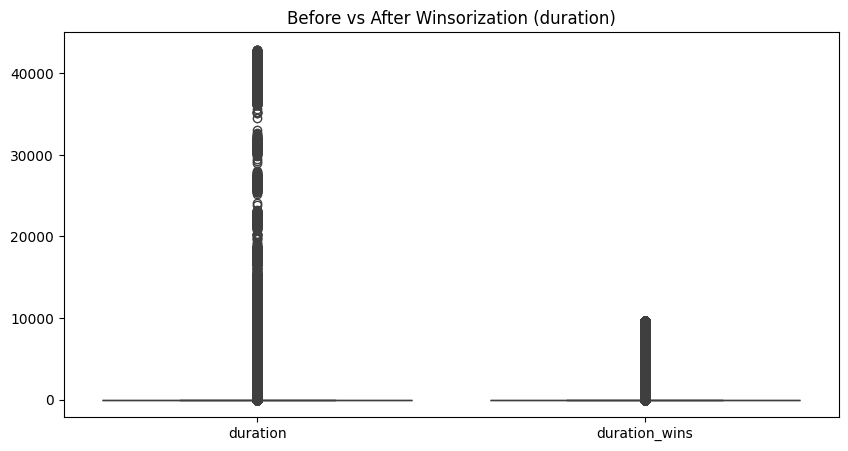

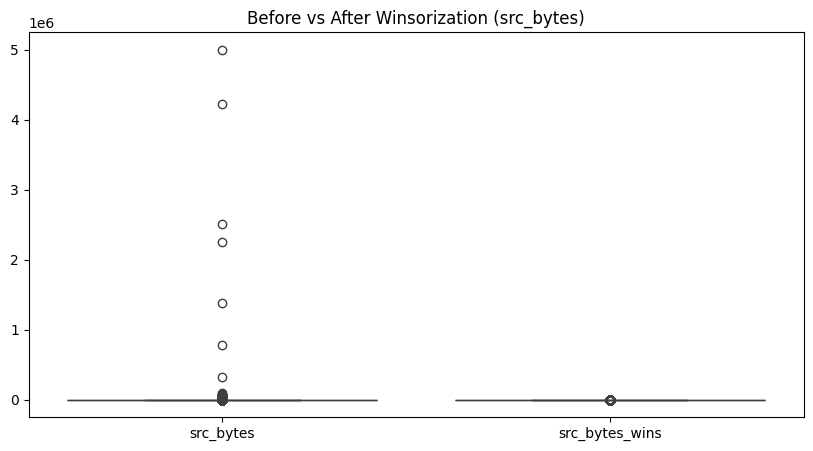

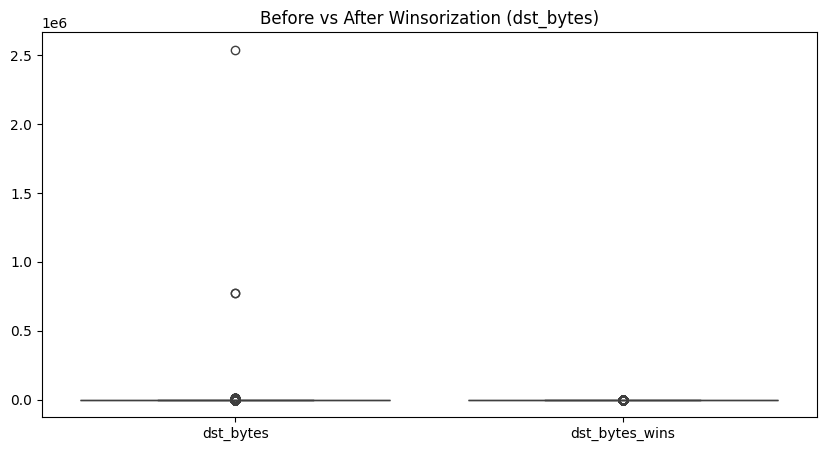

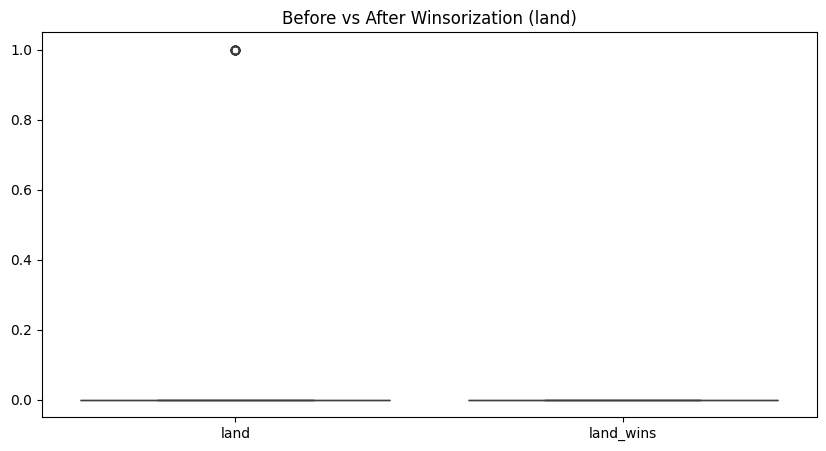

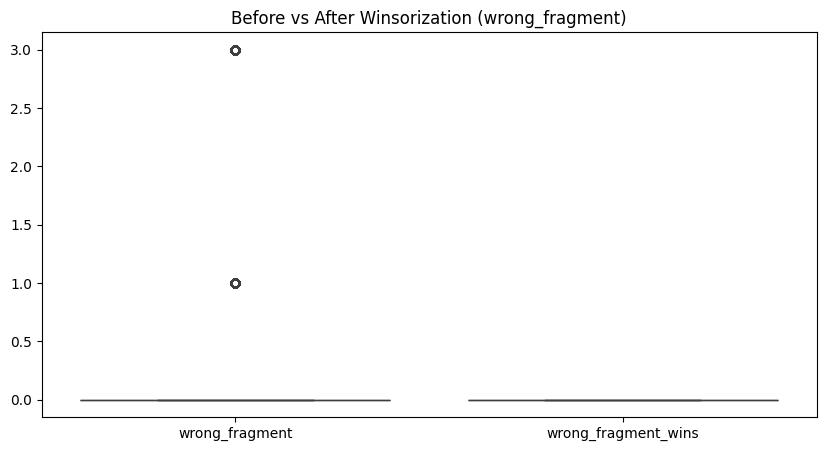

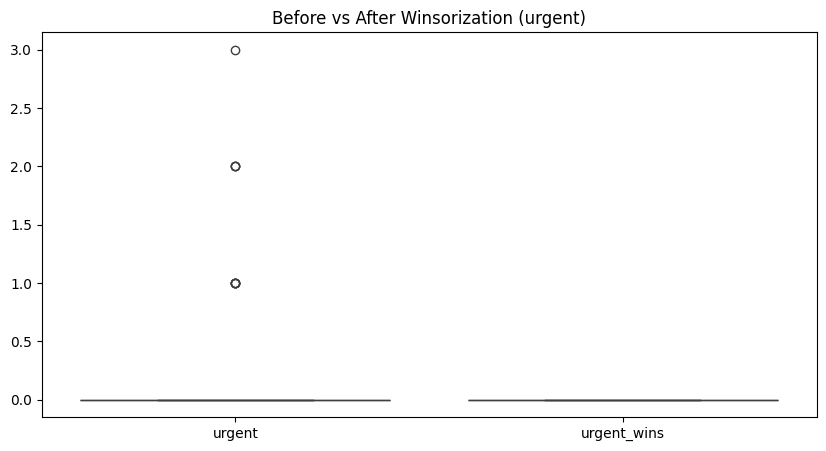

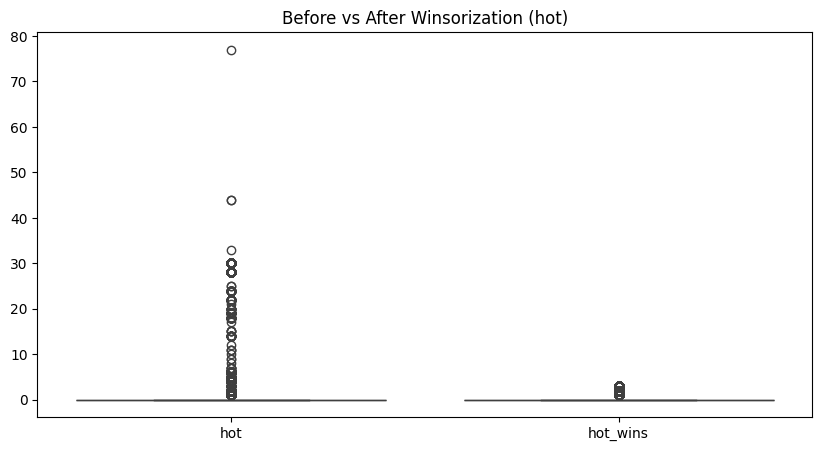

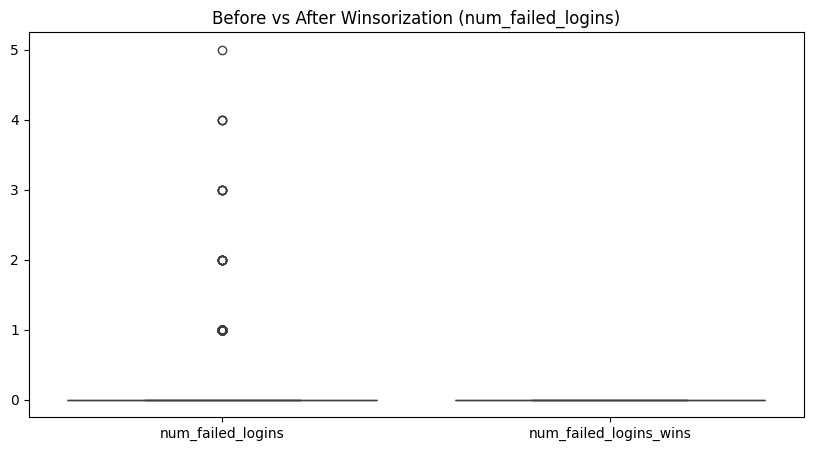

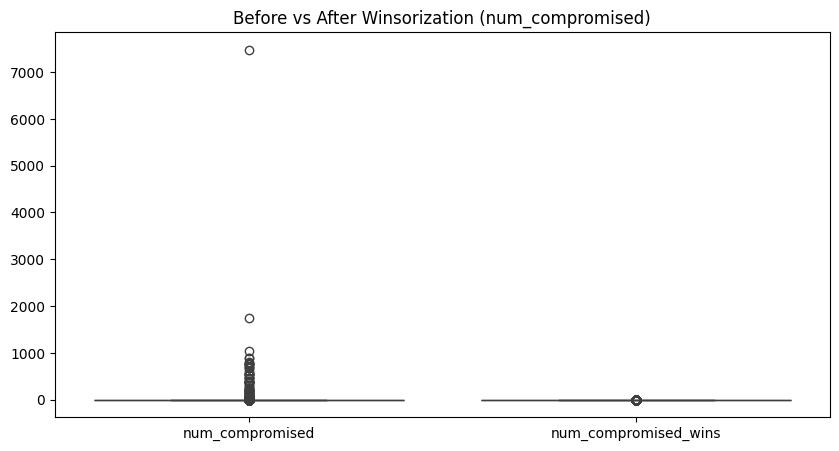

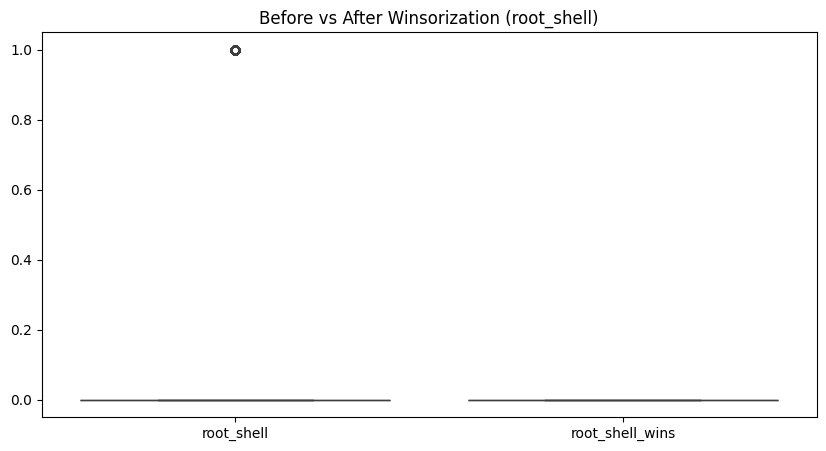

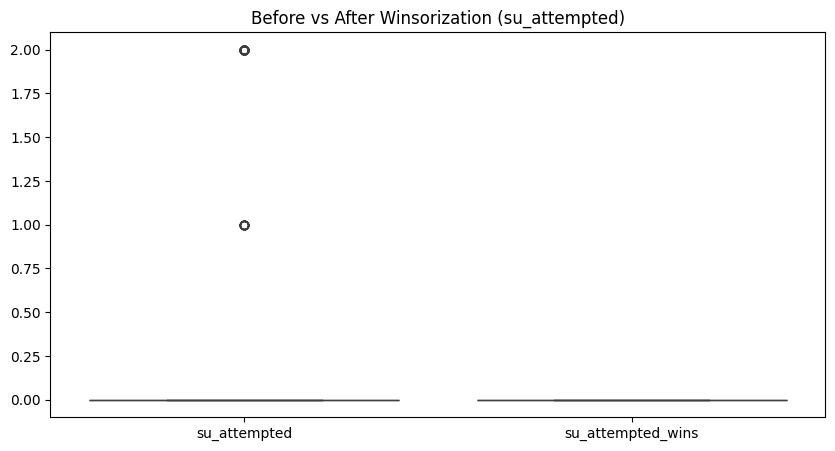

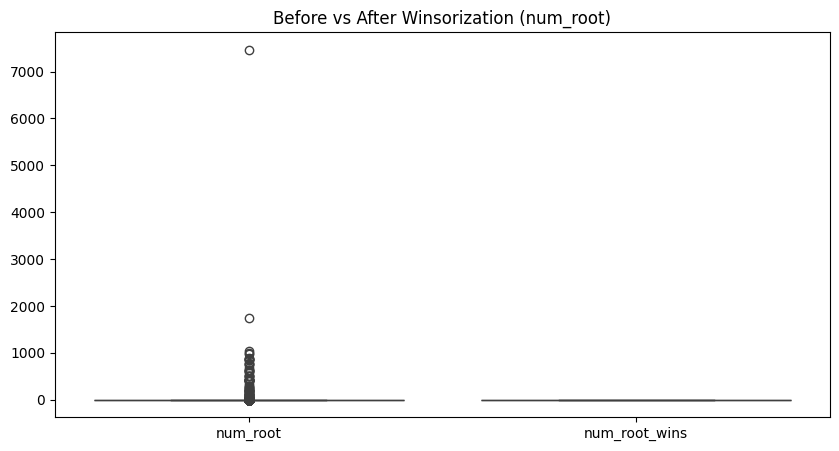

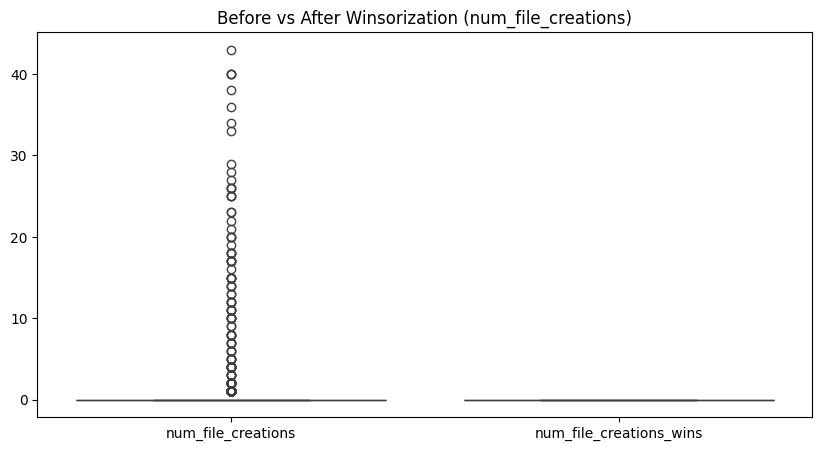

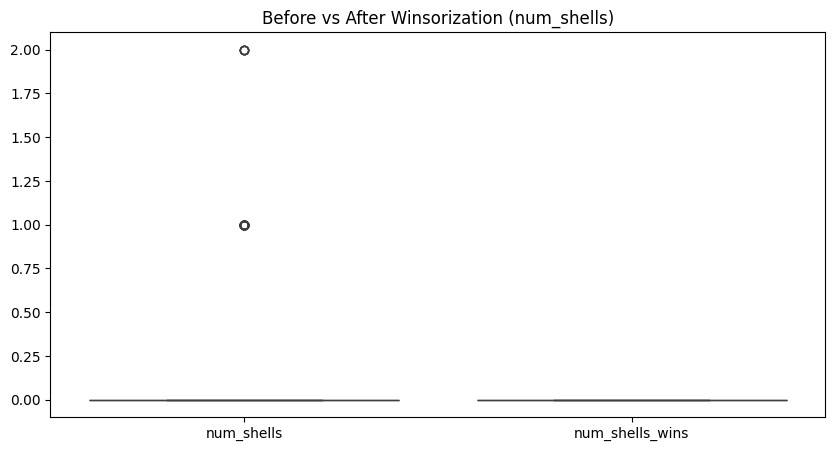

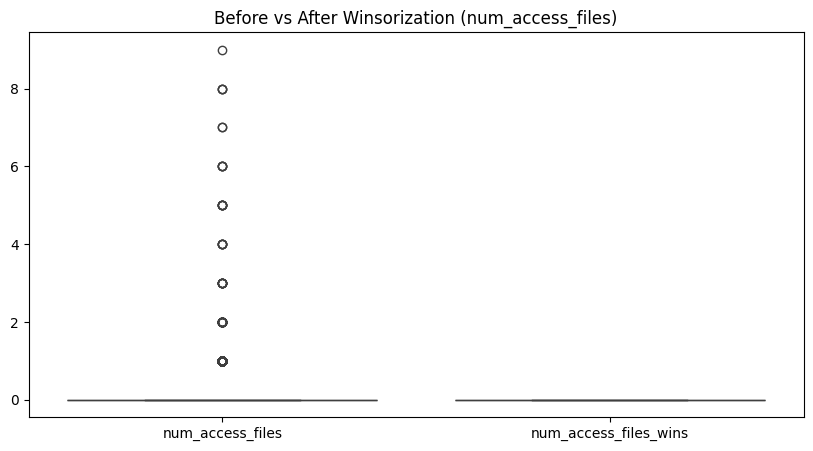

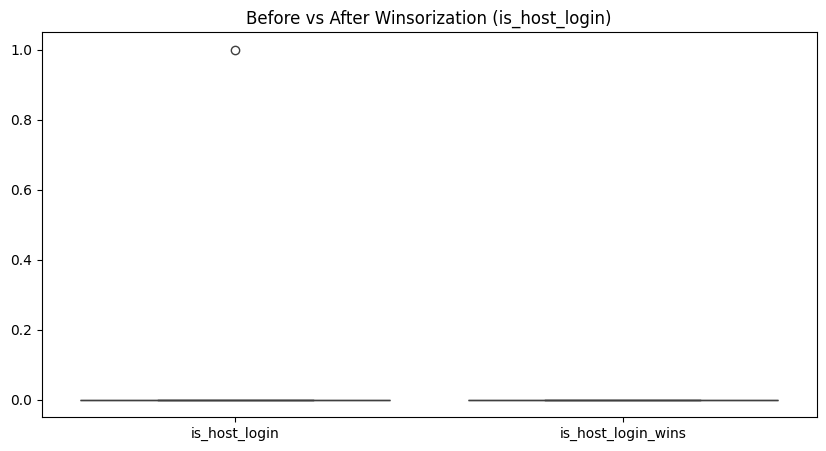

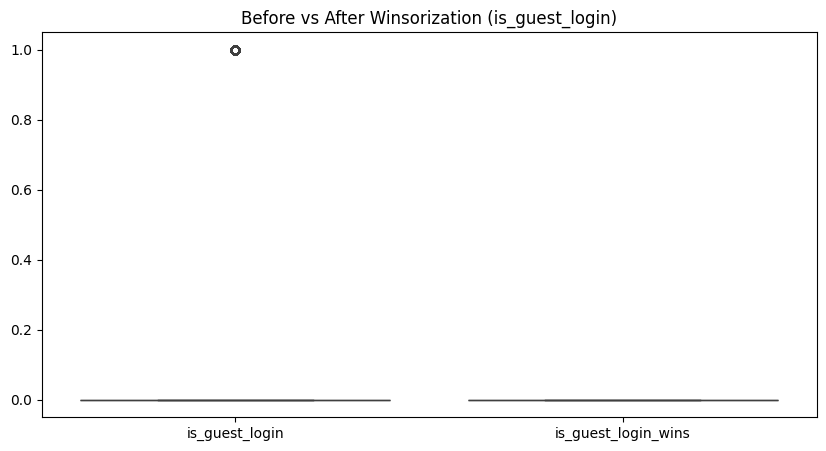

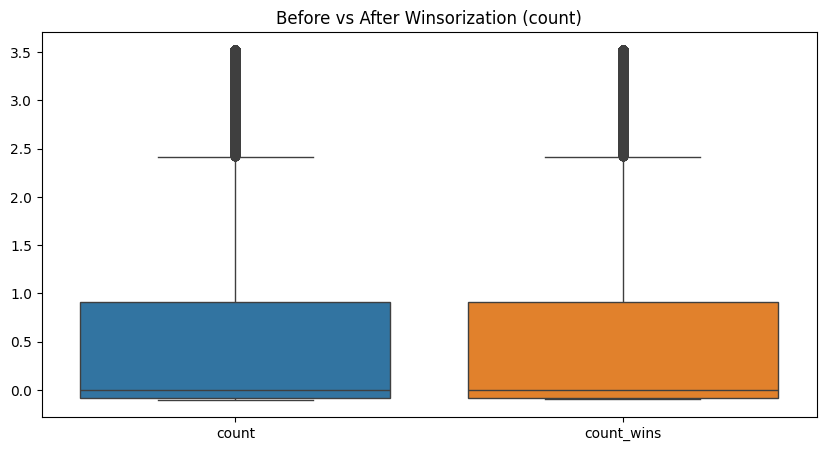

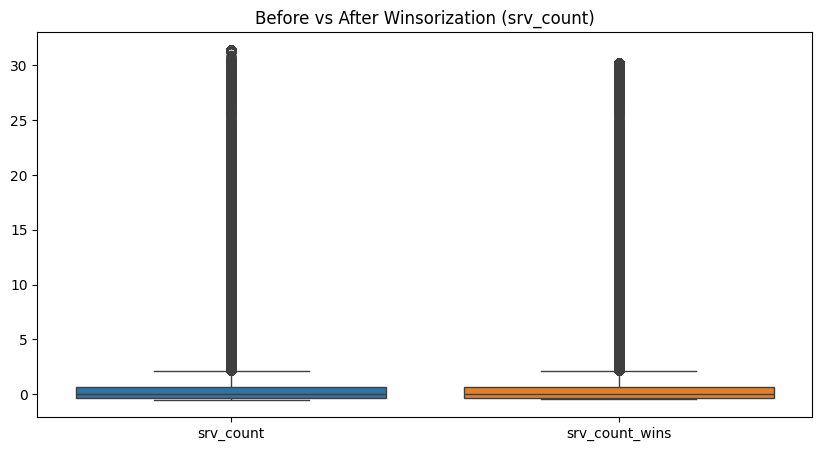

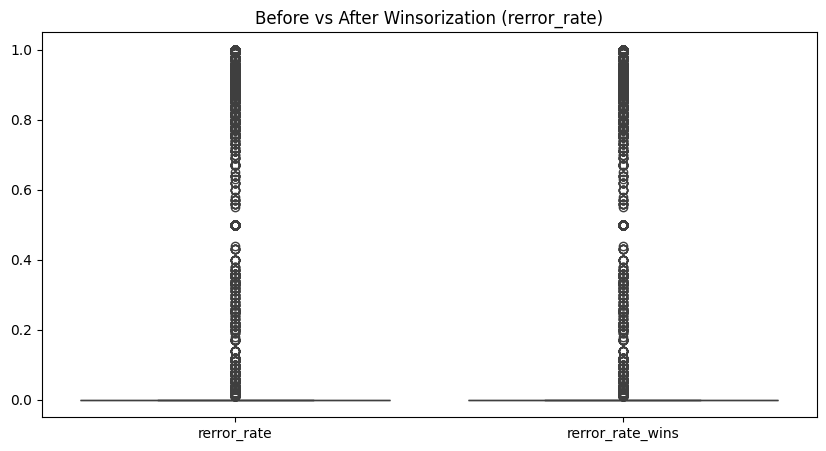

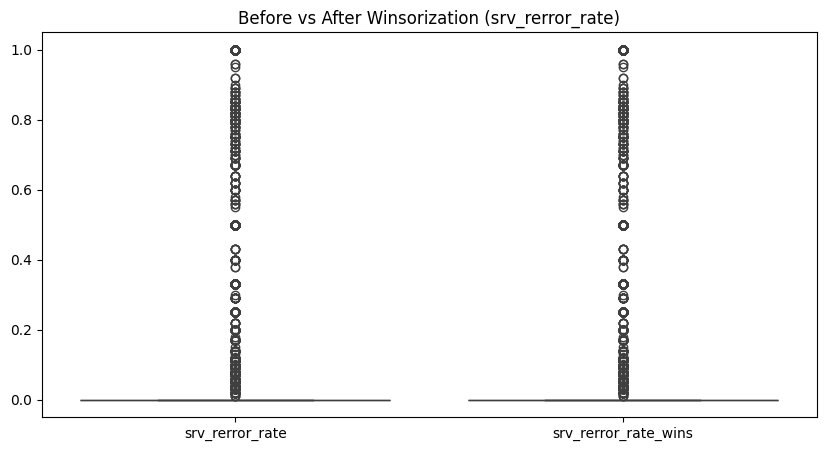

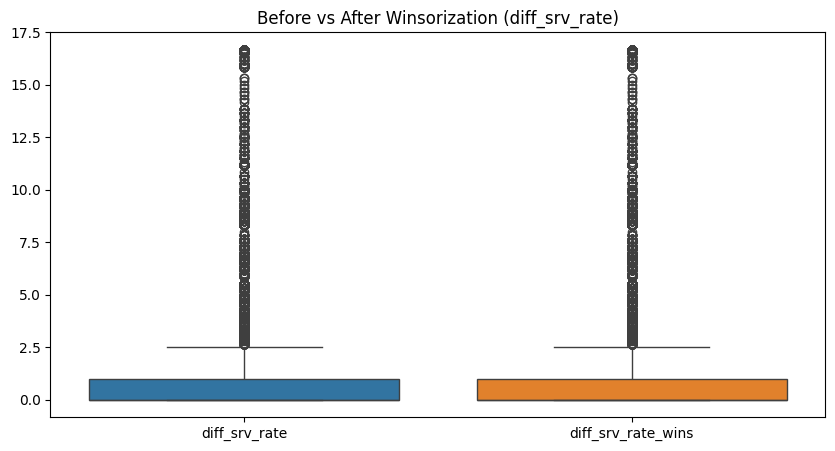

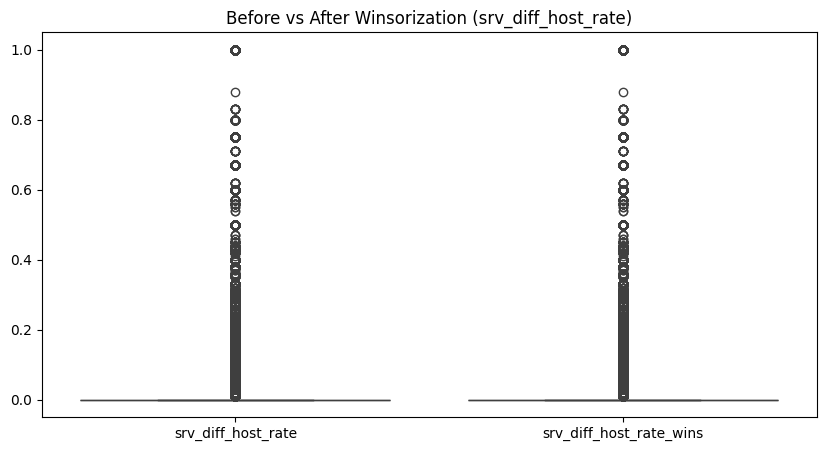

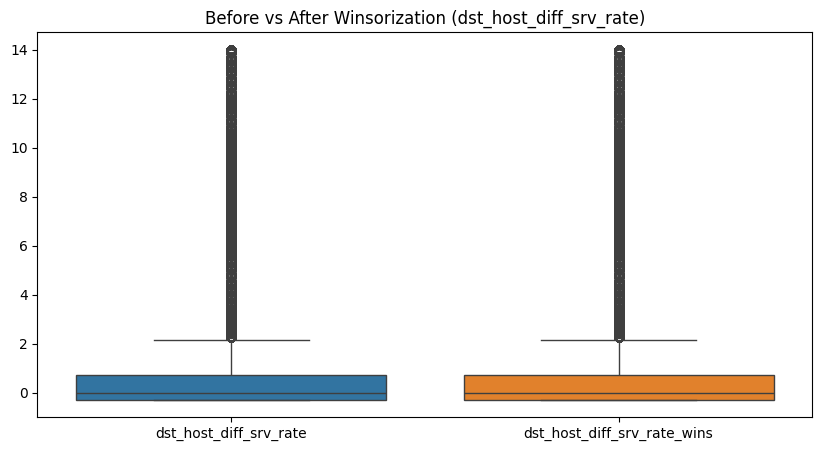

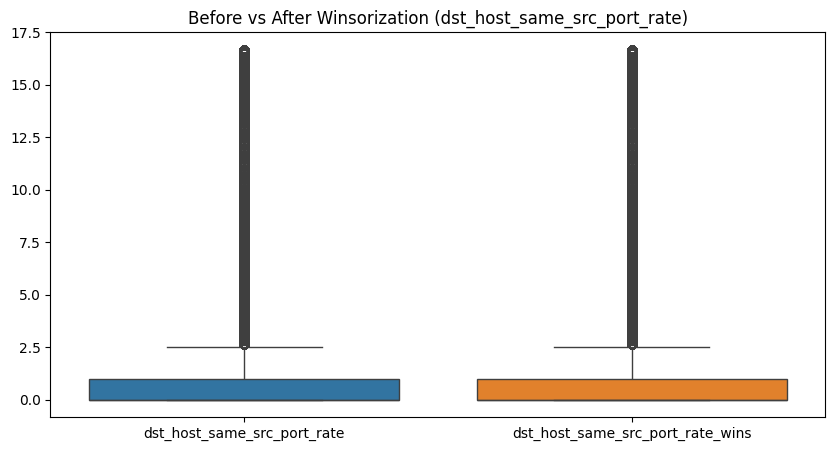

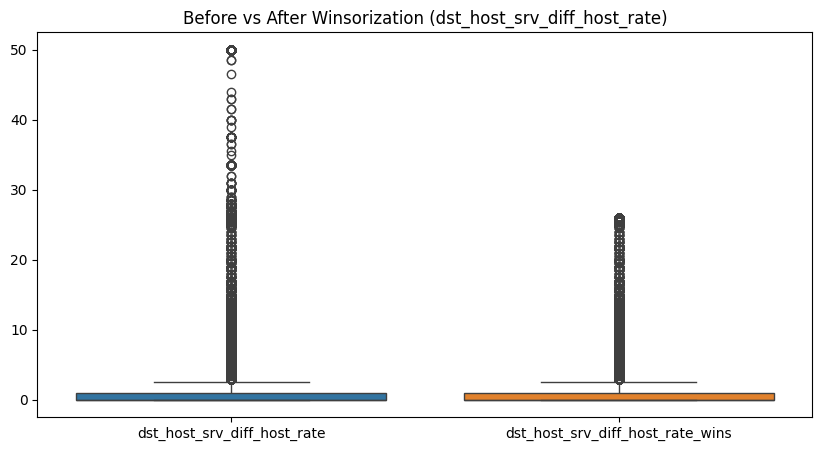

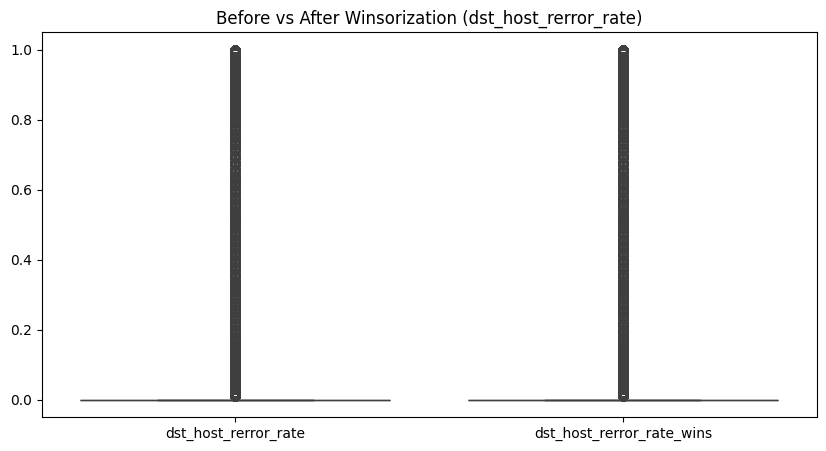

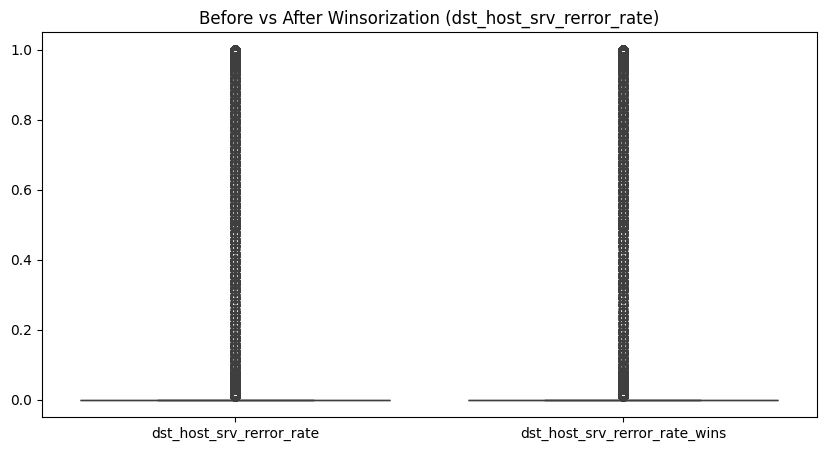

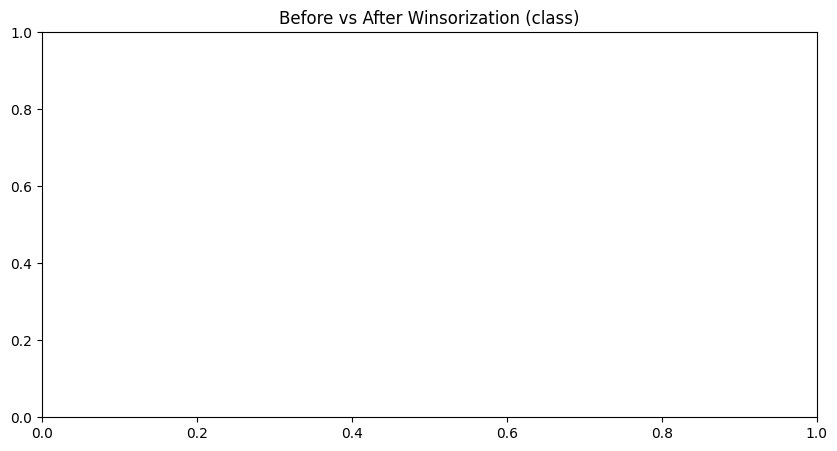

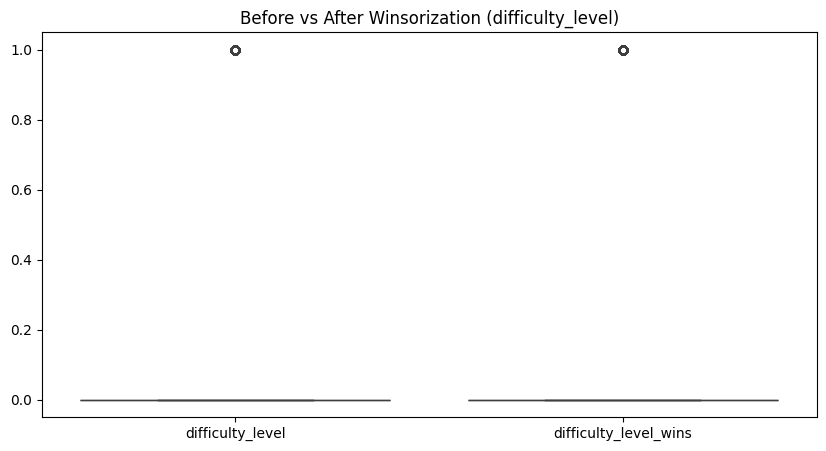

In [ ]:
from scipy.stats.mstats import winsorize

def winsorize_series(series, limits=(0.01, 0.01)):
    return winsorize(series, limits=limits)

# List of features identified as having extreme outliers after Robust Scaling
features_to_winsorize = ['duration', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count',
    'rerror_rate', 'srv_rerror_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    # Target + difficulty
    'class', 'difficulty_level'] # Replace with your identified features

for col in features_to_winsorize:
    if col in df_scaled.columns:
        df_scaled[f"{col}_wins"] = winsorize_series(df_scaled[col])
        print(f"Applied Winsorization to '{col}'. New column: '{col}_wins'")
    else:
        print(f" Column '{col}' not found in df_scaled for Winsorization.")

# You can then visualize the effect of Winsorization on these specific features
for col in features_to_winsorize:
    if f"{col}_wins" in df_scaled.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df_scaled[[col, f"{col}_wins"]])
        plt.title(f"Before vs After Winsorization ({col})")
        plt.show()

Class Distribution:
 class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


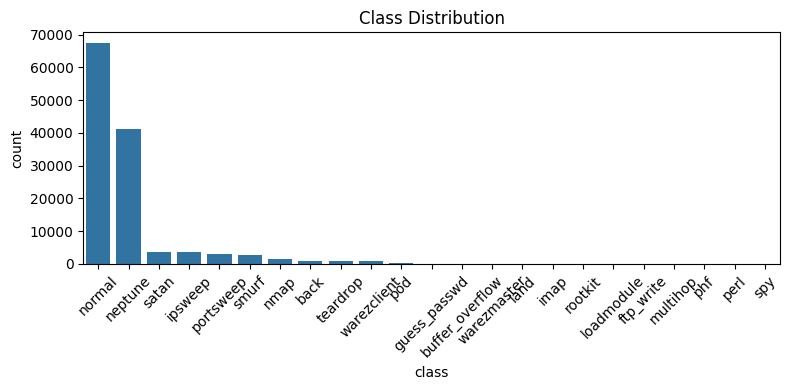

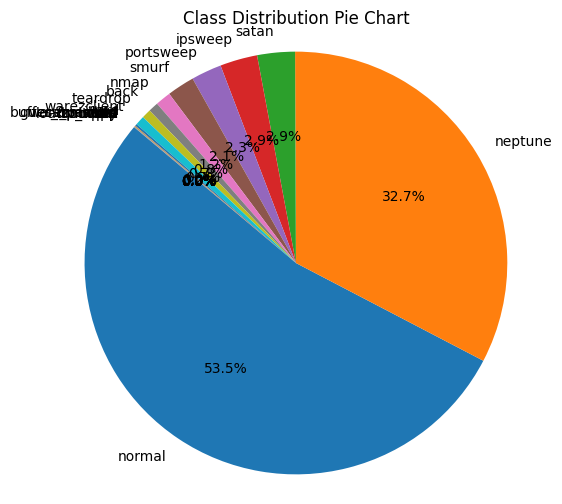

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Class Distribution Analysis
# -------------------------------
class_counts = df_scaled['class'].value_counts()
print("Class Distribution:\n", class_counts)

# Bar Plot
plt.figure(figsize=(8, 4))
sns.countplot(data=df_scaled, x='class', order=class_counts.index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution Pie Chart")
plt.axis('equal')
plt.show()

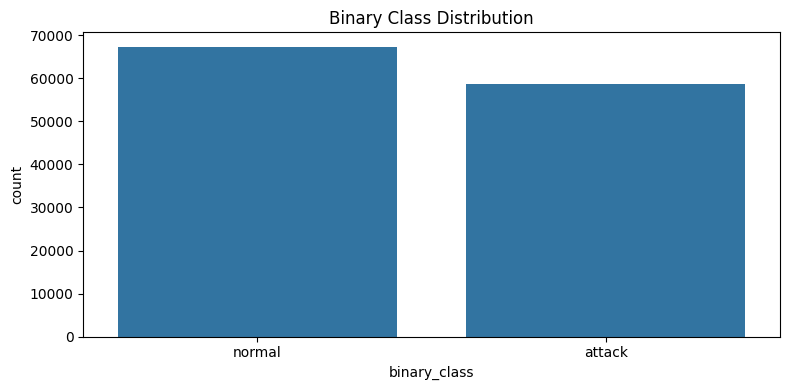

In [ ]:
df_binary = df_scaled.copy()
df_binary["binary_class"] = df_binary["class"].apply(lambda x: "normal" if x == "normal" else "attack")
binary_counts = df_binary["binary_class"].value_counts()

plt.figure(figsize=(8, 4))
sns.countplot(data=df_binary, x="binary_class", order=binary_counts.index)
plt.title("Binary Class Distribution")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_encoded.drop(columns=["class", "difficulty_level"])
y = df_encoded["class"]

# Optionally simplify class for binary classification
y_binary = y.apply(lambda x: 0 if x == "normal" else 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_smote))

# Apply ADASYN (alternative)
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print("After ADASYN:", Counter(y_adasyn))

After SMOTE: Counter({1: 47140, 0: 47140})
After ADASYN: Counter({1: 47187, 0: 47140})


In [ ]:
import os

output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# --- 1. Original Encoded + Scaled Data ---
df_scaled.to_csv(f"{output_dir}/df_scaled.csv", index=False)
df_scaled.to_parquet(f"{output_dir}/df_scaled.parquet", index=False)
print("Saved: df_scaled (Robust Scaled + Encoded)")

# --- 2. Winsorized  ---
df_scaled.to_csv(f"{output_dir}/df_scaled_winsorized.csv", index=False)
df_scaled.to_parquet(f"{output_dir}/df_scaled_winsorized.parquet", index=False)
print("Saved: df_scaled with Winsorized columns")

# --- 3. SMOTE Resampled ---
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['class'] = y_smote
df_smote.to_csv(f"{output_dir}/df_smote.csv", index=False)
df_smote.to_parquet(f"{output_dir}/df_smote.parquet", index=False)
print("Saved: SMOTE-resampled dataset")

# --- 4. ADASYN Resampled ---
df_adasyn = pd.DataFrame(X_adasyn, columns=X.columns)
df_adasyn['class'] = y_adasyn
df_adasyn.to_csv(f"{output_dir}/df_adasyn.csv", index=False)
df_adasyn.to_parquet(f"{output_dir}/df_adasyn.parquet", index=False)
print("Saved: ADASYN-resampled dataset")

Saved: df_scaled (Robust Scaled + Encoded)
Saved: df_scaled with Winsorized columns


/tmp/ipython-input-12-2843564286.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_smote['class'] = y_smote


Saved: SMOTE-resampled dataset


/tmp/ipython-input-12-2843564286.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_adasyn['class'] = y_adasyn


Saved: ADASYN-resampled dataset


ds

In [ ]:
# Create directories for models and results
os.makedirs("models", exist_ok=True)
os.makedirs("results", exist_ok=True)
os.makedirs("plots", exist_ok=True)

In [ ]:
!upgrade pip

/bin/bash: line 1: upgrade: command not found


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00


 Implement Evaluation Framework


In [ ]:
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score,
                             confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import joblib

def evaluate_model(model, X_test, y_test, model_name):
    """
    Comprehensive evaluation of anomaly detection models
    """
    # Predictions
    if hasattr(model, 'decision_function'):
        scores = model.decision_function(X_test)
    else:
        scores = model.score_samples(X_test)

    y_pred = model.predict(X_test)

    # Convert outlier labels (1 = inlier, -1 = outlier) to binary (0 = inlier, 1 = outlier)
    y_pred_bin = (y_pred == -1).astype(int)
    y_test_bin = (y_test == -1).astype(int)

    # Calculate metrics
    metrics = {
        'precision': precision_score(y_test_bin, y_pred_bin),
        'recall': recall_score(y_test_bin, y_pred_bin),
        'f1': f1_score(y_test_bin, y_pred_bin),
        'roc_auc': roc_auc_score(y_test_bin, scores),
        'pr_auc': average_precision_score(y_test_bin, scores)
    }

    # Save metrics
    pd.DataFrame(metrics, index=[model_name]).to_csv(f"results/{model_name}_metrics.csv")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(f"plots/{model_name}_confusion_matrix.png")
    plt.close()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin, scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr)
    plt.title(f"{model_name} ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.savefig(f"plots/{model_name}_roc_curve.png")
    plt.close()

    # Plot PR curve
    precision, recall, _ = precision_recall_curve(y_test_bin, scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.title(f"{model_name} Precision-Recall Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.savefig(f"plots/{model_name}_pr_curve.png")
    plt.close()

    return metrics

3. Implement Bayesian Optimization with Pipelines

In [ ]:
# Assuming you have X and y ready (with y being binary: 0 for normal, 1 for anomaly)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization pipeline
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

isolation

In [ ]:
df_train = df_scaled[df_scaled['class'] == 0].drop(columns=['class'])
df_test = df_scaled.copy()
y_test = df_scaled['class']


In [ ]:
print(df_scaled['class'].value_counts())


class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score




In [ ]:
print(df_train.dtypes[df_train.dtypes == 'object'])


class_wins    object
dtype: object


In [ ]:
df_scaled = df_scaled.drop(columns=['class', 'class_wins'])


In [ ]:
print(df_scaled.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'rerror_rate_wins', 'srv_rerror_rate_wins', 'diff_srv_rate_wins',
       'srv_diff_host_rate_wins', 'dst_host_diff_srv_rate_wins',
       'dst_host_same_src_port_rate_wins', 'dst_host_srv_diff_host_rate_wins',
       'dst_host_rerror_rate_wins', 'dst_host_srv_rerror_rate_wins',
       'difficulty_level_wins'],
      dtype='object', length=151)


In [ ]:
df1 = pd.read_csv("processed_data/df_scaled_winsorized.csv")


In [ ]:
# Load your processed data
df = pd.read_csv("processed_data/df_scaled_winsorized.csv")

# Create binary label: 0 = normal, 1 = attack
df['label'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Drop the original class column (optional, for modeling)
df = df.drop(columns=['class'])


In [ ]:
df.select_dtypes(include='object').columns


Index(['class_wins'], dtype='object')

In [ ]:
df = df.select_dtypes(include=['int64', 'float64'])


In [ ]:
assert df.select_dtypes(include='object').empty, "Still contains non-numeric columns!"


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

# Load data
df = pd.read_csv("processed_data/df_scaled_winsorized.csv")

# Add binary label
df['label'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)
df = df.drop(columns=['class'])

# Drop non-numeric columns
df = df.select_dtypes(include=['int64', 'float64'])

# Split
X = df.drop(columns=['label'])
y = df['label']
X_train = X[y == 0]  # only normal
X_test = X
y_test = y

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_train)

# Predict
y_pred = model.predict(X_test)
y_pred = [0 if x == 1 else 1 for x in y_pred]

# Evaluate
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92     67343
           1       0.89      0.94      0.91     58630

    accuracy                           0.92    125973
   macro avg       0.92      0.92      0.92    125973
weighted avg       0.92      0.92      0.92    125973

AUC-ROC: 0.9194473014471327


In [ ]:
print(X_train.columns.tolist())


['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u',

In [ ]:
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 67343 entries, 0 to 125972
Columns: 151 entries, duration to difficulty_level_wins
dtypes: float64(151)
memory usage: 78.1 MB
None


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 153 entries, duration to difficulty_level_wins
dtypes: float64(151), object(2)
memory usage: 147.0+ MB


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score

# Train only on normal data
X_train = X[y == 0]
X_test = X
y_test = y

# Train One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
svm_model.fit(X_train)

# Predict: 1 = normal, -1 = anomaly
y_pred = svm_model.predict(X_test)
y_pred = [0 if p == 1 else 1 for p in y_pred]

# Evaluate
print("One-Class SVM:")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


One-Class SVM:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70     67343
           1       0.67      0.23      0.35     58630

    accuracy                           0.59    125973
   macro avg       0.62      0.57      0.52    125973
weighted avg       0.62      0.59      0.54    125973

AUC-ROC: 0.5674250484843544


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)  # No separate train/test
y_pred = [0 if p == 1 else 1 for p in y_pred]

print("Local Outlier Factor:")
print(classification_report(y, y_pred))
print("AUC-ROC:", roc_auc_score(y, y_pred))


Local Outlier Factor:
              precision    recall  f1-score   support

           0       0.53      0.89      0.66     67343
           1       0.39      0.08      0.14     58630

    accuracy                           0.51    125973
   macro avg       0.46      0.49      0.40    125973
weighted avg       0.47      0.51      0.42    125973

AUC-ROC: 0.4858128222324548


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import RobustScaler

# Step 1: Load data
df = pd.read_csv("processed_data/df_scaled_winsorized.csv")

# Step 2: Add binary label: 0 = normal, 1 = attack
df['label'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)
df = df.drop(columns=['class'])

# Step 3: Drop non-numeric columns if any
df = df.select_dtypes(include=[np.number])

# Step 4: Prepare train/test data
X = df.drop(columns=['label'])
y = df['label']
X_train = X[y == 0]  # normal only for training
X_test = X
y_test = y

# Step 5: Build Autoencoder
input_dim = X.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

# Step 6: Train on normal data (uses GPU)
history = model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

# Step 7: Predict reconstruction on test set
X_pred = model.predict(X_test)
recon_error = np.mean(np.power(X_test - X_pred, 2), axis=1)

# Step 8: Set threshold (based on 95th percentile of normal training errors)
threshold = np.percentile(np.mean(np.power(X_train - model.predict(X_train), 2), axis=1), 95)

# Step 9: Classify based on threshold
y_pred = [1 if err > threshold else 0 for err in recon_error]

# Step 10: Evaluate
print("Autoencoder Performance:")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, recon_error))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 151)            │         9,815 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,735 (92.71 KB)

 Trainable params: 23,735 (92.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 25913.0664 - val_loss: 473.3091
Epoch 2/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2489.3665 - val_loss: 168.3921
Epoch 3/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 404.5798 - val_loss: 83.1444
Epoch 4/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3493.6907 - val_loss: 72.7024
Epoch 5/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 222.9044 - val_loss: 123.2766
Epoch 6/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 165.0511 - val_loss: 60.5166
Epoch 7/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 114.5411 - val_loss: 394.2275
Epoch 8/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 669.2077 - val_loss: 137.5971
Epoch 9/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 666.3712 - val_loss: 34.1978
Epoch 10/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 324.6745 - val_loss: 32.5725
Epoch 11/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96.0949 - val_loss: 29.9581
Epoch 12/50